<a href="https://colab.research.google.com/github/Nikku831/CarPriceML/blob/main/CarPriceML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [ ]:
car=pd.read_csv('quikr_car.csv')

In [ ]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
car.shape

(892, 6)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


Creating backup

In [ ]:
backup=car.copy()

#Data Quality
* names are pretty inconsistent
* names have company names attached to it
* some names are spam like 'Maruti Ertiga showroom condition with' and 'Well * mentained Tata Sumo'
* company: many of the names are not of any company like 'Used', 'URJENT', and so on.
* year has many non-year values
* year is in object. Change to integer
* Price has Ask for Price
* Price has commas in its prices and is in object
* kms_driven has object values with kms at last.
* It has nan values and two rows have 'Petrol' in them
* fuel_type has nan values

#Cleaning data
Invalid years and present as string

In [ ]:
car=car[car['year'].str.isnumeric()]
car=car.copy()
car['year']=car['year'].astype(int)

Price has string and commas

In [ ]:
car=car[car['Price']!='Ask For Price']
car['Price']=car['Price'].str.replace(',','').astype(int)

kms_driven has commas and kms

In [ ]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

fuel_type has Nan values

In [ ]:
car=car[~car['fuel_type'].isna()]

In [ ]:
car.shape

(816, 6)

Final editing

In [ ]:
car=car.copy()
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')
car=car.reset_index(drop=True)

#Cleaned Data

In [ ]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [ ]:
car.to_csv('Cleaned_Car_data.csv')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 38.4+ KB


In [ ]:
car.describe(include="all")

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816,816
unique,254,25,NaN,NaN,248,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,45000,Petrol
freq,51,221,NaN,NaN,30,428
mean,NaN,NaN,2012.444853,4.117176e+05,NaN,NaN
std,NaN,NaN,4.002992,4.751844e+05,NaN,NaN
min,NaN,NaN,1995.000000,3.000000e+04,NaN,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,NaN,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,NaN,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,NaN,NaN


Relation of Price with independent features

In [ ]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

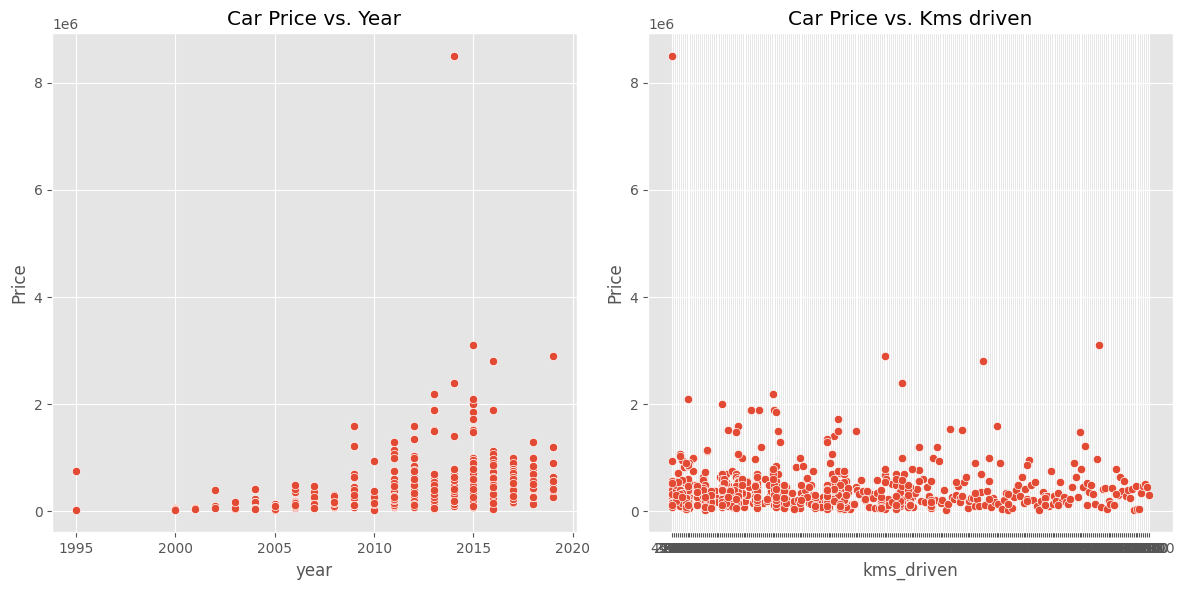

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=car, x='year', y='Price')
plt.title('Car Price vs. Year')

plt.subplot(1, 2, 2)
sns.scatterplot(data=car, x='kms_driven', y='Price')
plt.title('Car Price vs. Kms driven')

plt.tight_layout()
plt.show()

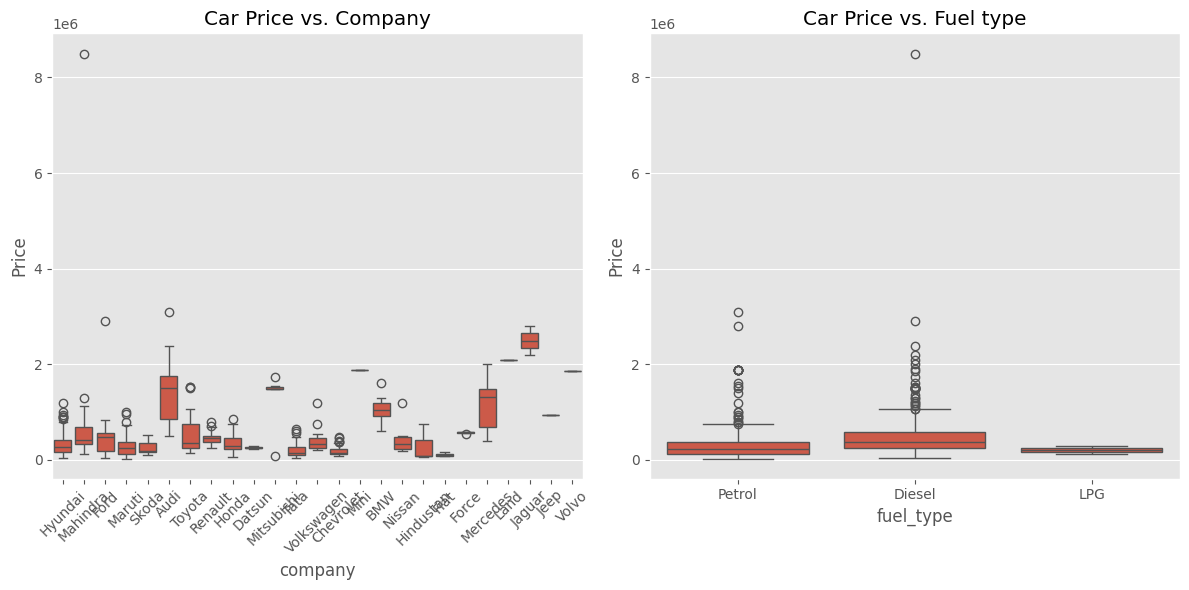

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=car, x='company', y='Price')
plt.xticks(rotation=45)
plt.title('Car Price vs. Company')

plt.subplot(1, 2, 2)
sns.boxplot(data=car, x='fuel_type', y='Price')
plt.title('Car Price vs. Fuel type')

plt.tight_layout()
plt.show()

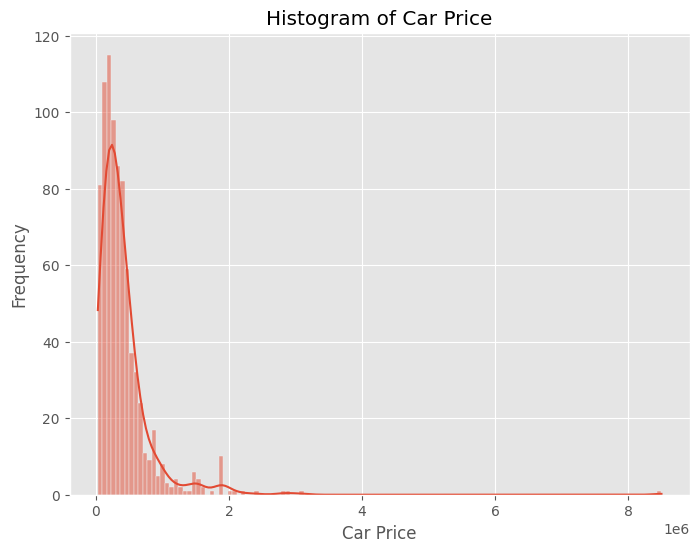

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(car['Price'], kde=True)
plt.title('Histogram of Car Price')
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.show()

#Prediction Model
Extracting training data

In [ ]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [ ]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [ ]:
y.shape

(816,)

Apply train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(816, 5) (652, 5) (164, 5)


In [ ]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

Train the linear regression model

In [ ]:
model = LinearRegression()
pipe=make_pipeline(column_trans,model)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

Finding the model with a random state of TrainTestSplit where the model gives maximum r2_score

In [ ]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

The best model is found at a certain random state

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

Evaluate the model

In [ ]:
r2 = r2_score(y_test, y_pred)
print("r2 score: ",r2)

r2 score:  0.8604602644312209


Making prediction using Model

In [ ]:
import pickle
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([455413.55294819])

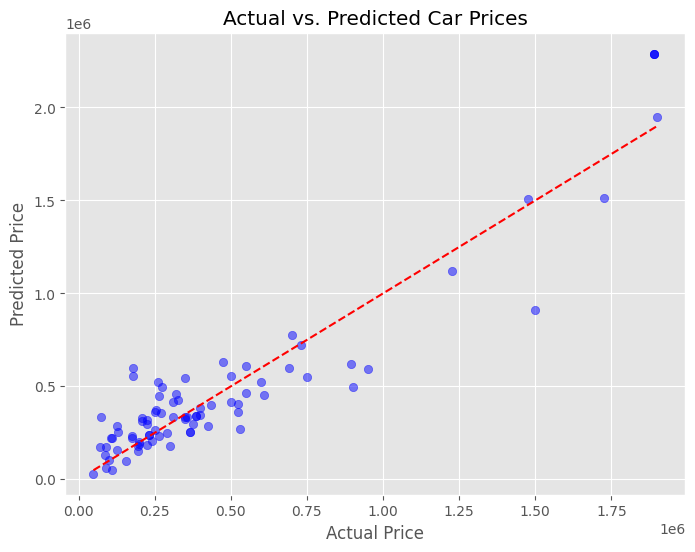

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Actual vs. Predicted Car Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()